## Daily Challenge: Complete Exploratory Data Analysis.

In [1]:
import pandas as pd

In [9]:
df = pd.read_csv(r'/content/ds_salaries.csv')

In [10]:
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [12]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [17]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [19]:
df.shape

(607, 11)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [34]:
df.drop_duplicates()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [35]:
salary_mean = df.groupby('experience_level', as_index=False).agg({'salary_in_usd':'mean'}).sort_values(by='salary_in_usd')
salary_mean.salary_in_usd = salary_mean.salary_in_usd.round(0)
salary_mean.rename(columns = {'salary_in_usd':'mean_salary_USD'}, inplace=True)
salary_mean.head()

,experience_level,mean_salary_USD
0,EN,61643.0
2,MI,87996.0
3,SE,138617.0
1,EX,199392.0


In [36]:
salary_median = df.groupby('experience_level', as_index=False).agg({'salary_in_usd':'median'}).sort_values(by='salary_in_usd')
salary_median.salary_in_usd = salary_median.salary_in_usd.round(0)
salary_median.rename(columns = {'salary_in_usd':'median_salary_USD'}, inplace=True)
salary_median.head()

,experience_level,median_salary_USD
0,EN,56500.0
2,MI,76940.0
3,SE,135500.0
1,EX,171438.0


In [37]:
salary_DS = salary_mean.merge(salary_median, on = 'experience_level')

In [38]:
salary_DS

,experience_level,mean_salary_USD,median_salary_USD
0,EN,61643.0,56500.0
1,MI,87996.0,76940.0
2,SE,138617.0,135500.0
3,EX,199392.0,171438.0


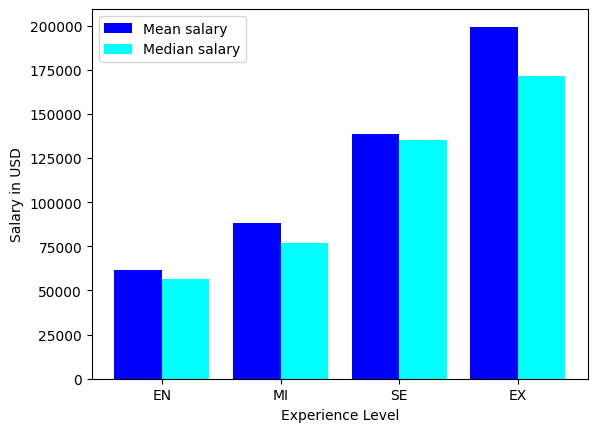

In [50]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

# create data
x = np.arange(4)
y1 = salary_DS.mean_salary_USD
y2 = salary_DS.median_salary_USD
width = 0.40

plt.bar(x-0.2, y1, width, color='blue')
plt.bar(x+0.2, y2, width, color='cyan')
plt.xticks(x, ['EN', 'MI', 'SE', 'EX'])
plt.xlabel("Experience Level")
plt.ylabel("Salary in USD")
plt.legend(["Mean salary", "Median salary"])
plt.show()

